In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfi = pd.read_csv("qsar_fish_toxicity.csv",\
    names=['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC',
      'MLOGP','responseLC50'],sep=';')

In [3]:
dfi.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,responseLC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
dfi.shape

(908, 7)

DATA EXPLORATION

In [5]:
#Missing values check
display("Feature -->Missing", dfi.isnull().sum())

'Feature -->Missing'

CIC0            0
SM1_Dz(Z)       0
GATS1i          0
NdsCH           0
NdssC           0
MLOGP           0
responseLC50    0
dtype: int64

In [6]:
#Unique values check
unique = []
for col in dfi.columns:
    unique.append(dfi[col].value_counts().count())

print(pd.DataFrame(unique, index= dfi.columns, columns=["Unqiue Values"]))

              Unqiue Values
CIC0                    502
SM1_Dz(Z)               186
GATS1i                  557
NdsCH                     5
NdssC                     7
MLOGP                   559
responseLC50            827


In [7]:
numeric_feat = [ "CIC0","SM1_Dz(Z)","GATS1i","MLOGP","responseLC50" ]
category_feat = ["NdsCH","NdssC"]

In [8]:
print("The categories are")
for col in category_feat:
    print(f'{col} --> {dfi[col].unique()}')

The categories are
NdsCH --> [0 1 3 2 4]
NdssC --> [1 0 3 2 4 5 6]


In [9]:
#Decsribing the numerical features
dfi[numeric_feat].describe()

,CIC0,SM1_Dz(Z),GATS1i,MLOGP,responseLC50
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,2.109285,4.064431
std,0.756088,0.428459,0.394303,1.433181,1.455698
min,0.667000,0.000000,0.396000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,1.209000,3.151750
50%,2.934000,0.570000,1.240500,2.127000,3.987500
75%,3.407000,0.892750,1.562250,3.105000,4.907500
max,5.926000,2.171000,2.920000,6.515000,9.612000


UNIVARIATE ANALYSIS : NUMERICAL FEATURES

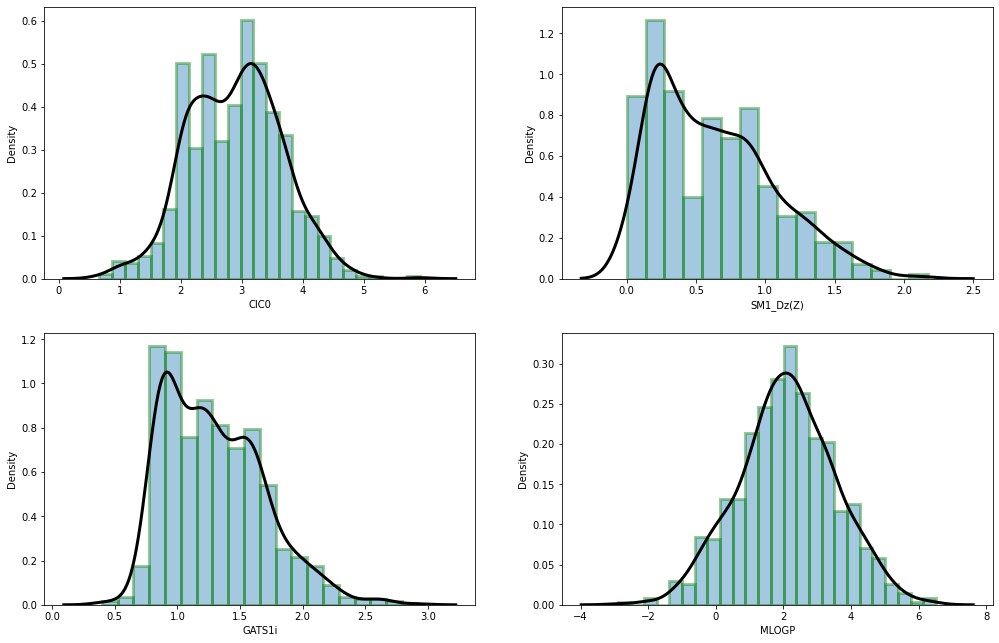

In [10]:
#Plot the distributions of numeric features
fig, axes = plt.subplots(2, 2, figsize=(17, 11))
ax = sns.distplot(dfi['CIC0'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[0][0])
ax = sns.distplot(dfi['SM1_Dz(Z)'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[0][1])
ax = sns.distplot(dfi['GATS1i'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[1][0])
ax = sns.distplot(dfi['MLOGP'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[1][1])


In [11]:
def normaldist_check_plots(df, variable):
    # function to plot a Q-Q plot
   
    plt.figure(figsize=(15,6))
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

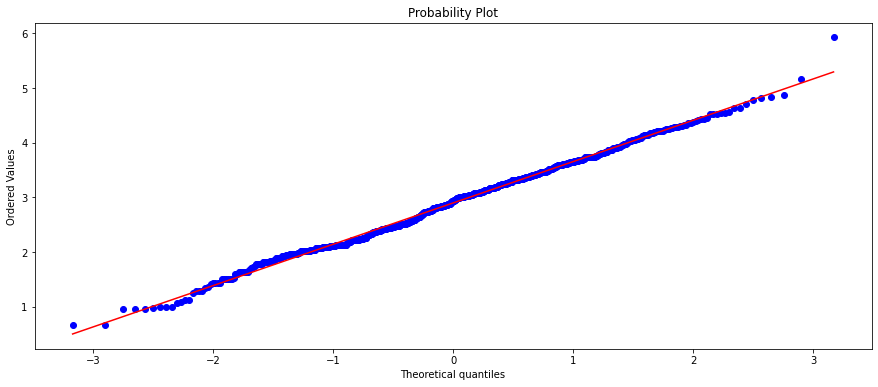

In [12]:
normaldist_check_plots(dfi,'CIC0')

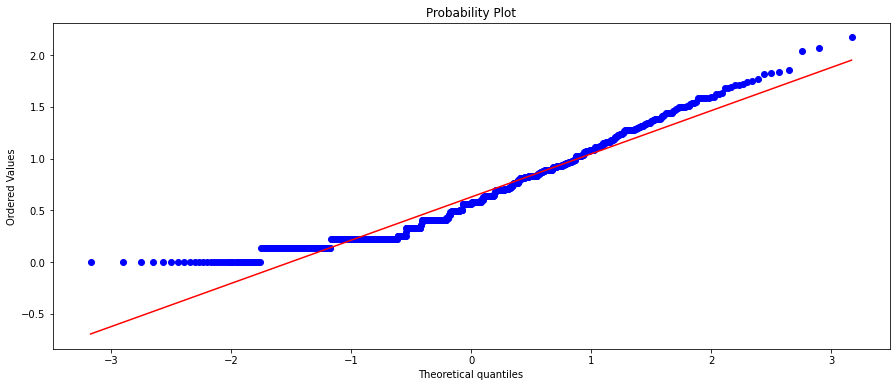

In [13]:
normaldist_check_plots(dfi,'SM1_Dz(Z)')

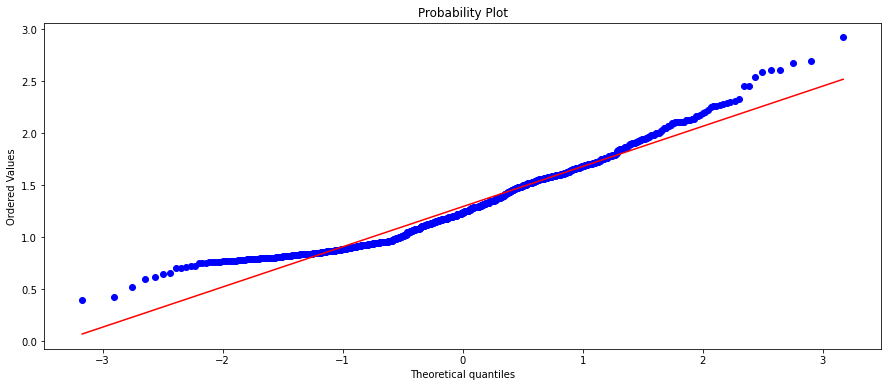

In [14]:
normaldist_check_plots(dfi,'GATS1i')

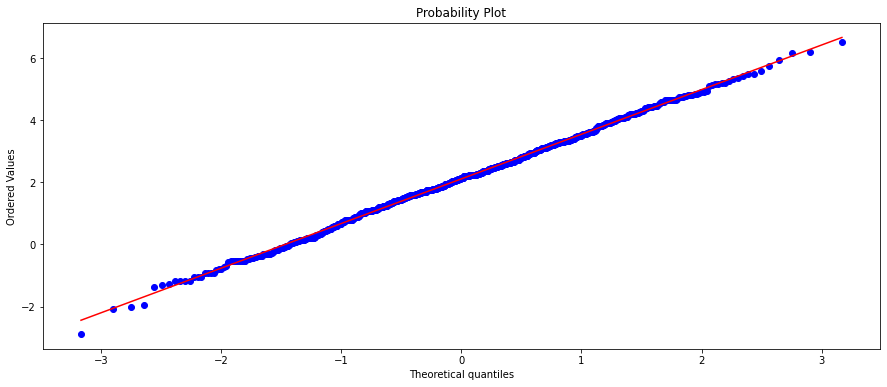

In [15]:
normaldist_check_plots(dfi,'MLOGP')

UNIVARIATE ANALYSIS : CATEGORICAL FEATURES

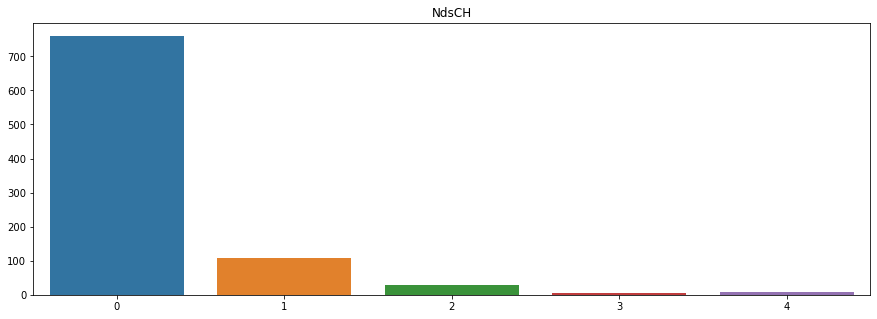

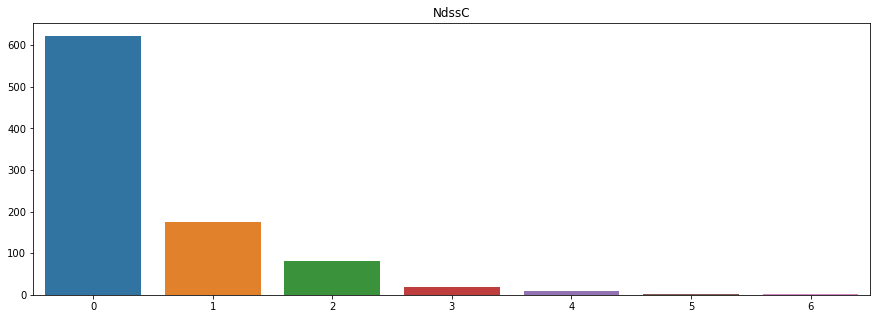

In [16]:
#Univariate Analysis of Categorical Variables
#Bar Plots

for i in list(category_feat):
    fig,ax = plt.subplots(figsize = (15,5))
    
    values = list(dfi[i].value_counts().index)
    total_values = list(dfi[i].value_counts())
    
    sns.barplot(x=values, y=total_values, data=dfi)
    
    plt.title(i)
    plt.show()

In [17]:
#See the correlation values of numeric features
dfi[numeric_feat].corr().iloc[:, [-1]]

,responseLC50
CIC0,0.291854
SM1_Dz(Z),0.410893
GATS1i,-0.397965
MLOGP,0.651664
responseLC50,1.000000


In [18]:
#See the correlation values of categoric features
category_feat.append('responseLC50')
print(dfi[category_feat].corr().iloc[:, [-1]])
category_feat.remove('responseLC50')

              responseLC50
NdsCH             0.172004
NdssC             0.172390
responseLC50      1.000000


In [19]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [20]:
dfi2 = dfi.copy(deep = True)

In [21]:
numeric_feat.remove('responseLC50')

In [22]:
print(numeric_feat)

['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'MLOGP']


In [23]:
print(category_feat)

['NdsCH', 'NdssC']


In [24]:
dfi2[numeric_feat].head()

,CIC0,SM1_Dz(Z),GATS1i,MLOGP
0,3.260,0.829,1.676,1.453
1,2.189,0.580,0.863,1.348
2,2.125,0.638,0.831,1.348
3,3.027,0.331,1.472,1.807
4,2.094,0.827,0.860,1.886


In [25]:
dfi2[category_feat].head()

,NdsCH,NdssC
0,0,1
1,0,0
2,0,0
3,1,0
4,0,0


In [26]:
scaled_data = robust_scaler.fit_transform(dfi2[numeric_feat])
df_scaled = pd.DataFrame(scaled_data, columns = numeric_feat)
df_scaled.head(10)

,CIC0,SM1_Dz(Z),GATS1i,MLOGP
0,0.307547,0.386711,0.712183,-0.355485
1,-0.702830,0.014931,-0.617334,-0.410865
2,-0.763208,0.101530,-0.669665,-0.410865
3,0.087736,-0.356850,0.378577,-0.168776
4,-0.792453,0.383725,-0.622240,-0.127110
5,0.271698,-0.356850,1.531480,-0.749473
6,0.231132,-0.851064,-0.290270,0.429852
7,0.062264,-0.851064,-0.494685,0.381857
8,-0.296226,-0.106010,-0.409648,0.429852
9,-0.094340,-0.650989,-0.475061,-0.282700


Analysis of Numerical-Categorical Features : Using a Box Plot

NdsCH


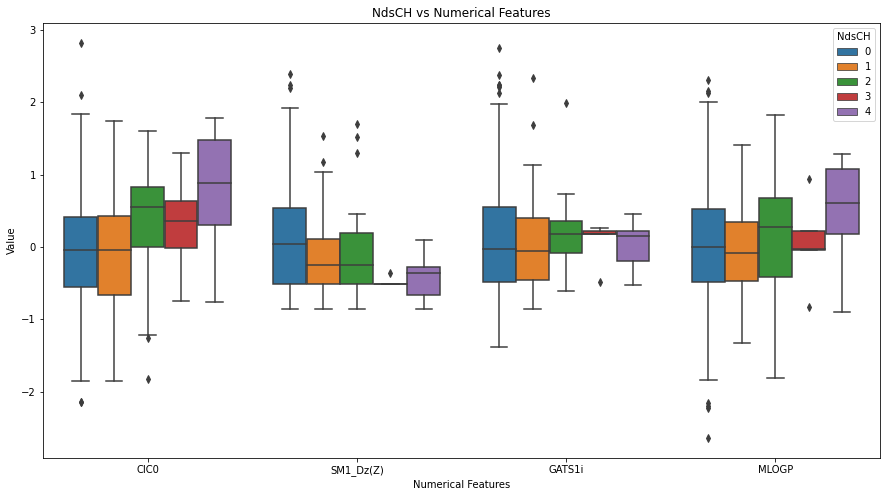

NdssC


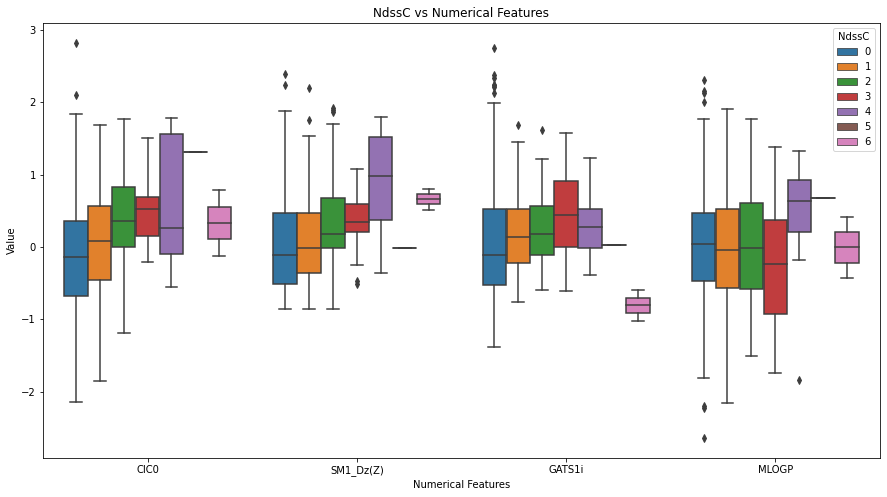

In [27]:
for i in category_feat:
    print(i)
    df2 = pd.concat([df_scaled, dfi2.loc[:, i]], axis = 1)
    mdf2 = pd.melt(df2, id_vars = i, var_name = "features", value_name = "value")
    
    plt.figure(figsize = (15,8))
    sns.boxplot(x = "features", y = "value", hue = i, data = mdf2)
    
    plt.title(f'{i} vs Numerical Features')
    plt.xlabel("Numerical Features")
    plt.ylabel("Value")
    
    plt.show()

HEATMAP ANALYSIS 

In [28]:
df_heat = pd.concat([df_scaled, dfi[category_feat]], axis = 1)

<AxesSubplot:>

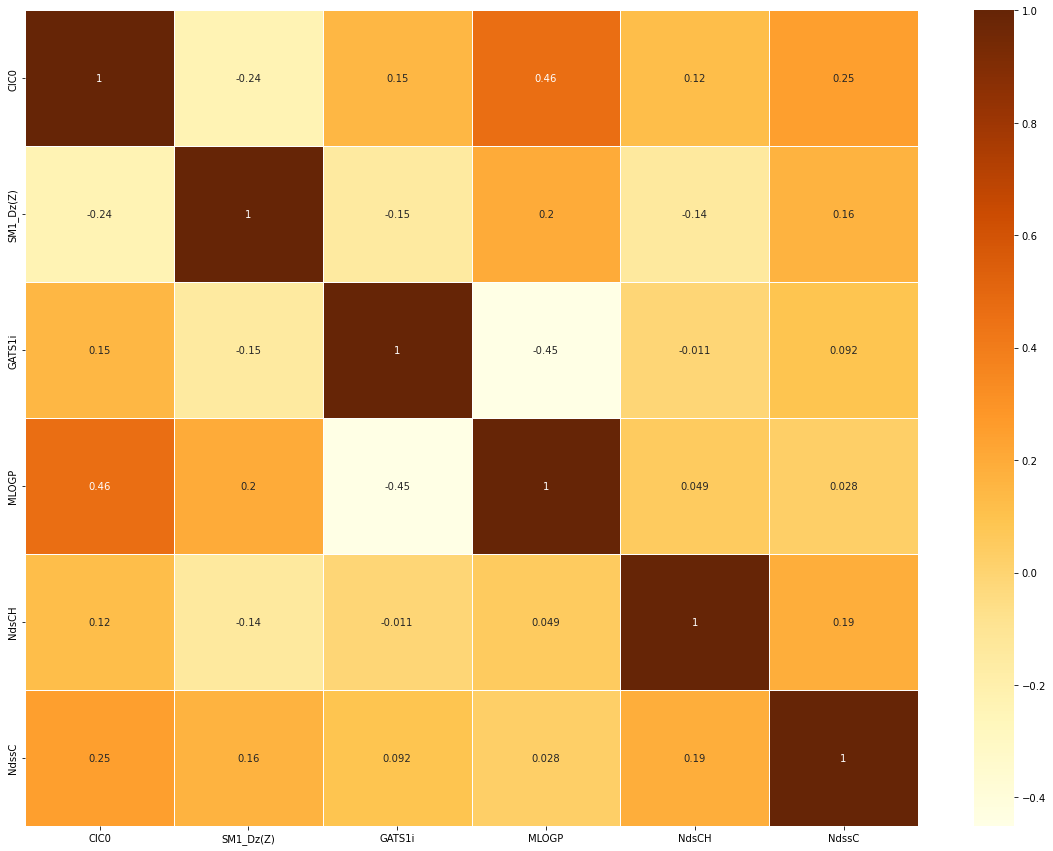

In [29]:
plt.figure(figsize = (20,15))
sns.heatmap(data = df_heat.corr(), cmap="YlOrBr", annot = True, linewidth = 0.5)

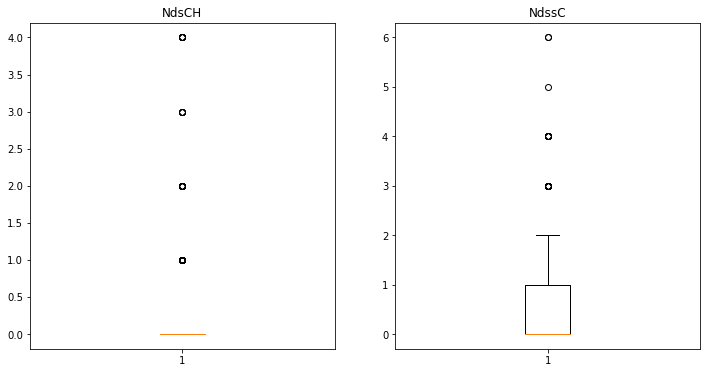

In [30]:
#Quick look at categorical variables outliers

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.boxplot(dfi['NdsCH'])
ax1.set_title("NdsCH")

ax2.boxplot(dfi['NdssC'])
ax2.set_title("NdssC")

plt.show()

Combine Catregorical Variables

In [31]:
dfi2['NdsCH'] = dfi2['NdsCH'].replace({3:2,4:2})
dfi2['NdsCH'].value_counts()

0    760
1    107
2     41
Name: NdsCH, dtype: int64

In [32]:
dfi2['NdssC'] = dfi2['NdssC'].replace({4:3,5:3,6:3})
dfi2['NdssC'].value_counts()

0    622
1    176
2     81
3     29
Name: NdssC, dtype: int64

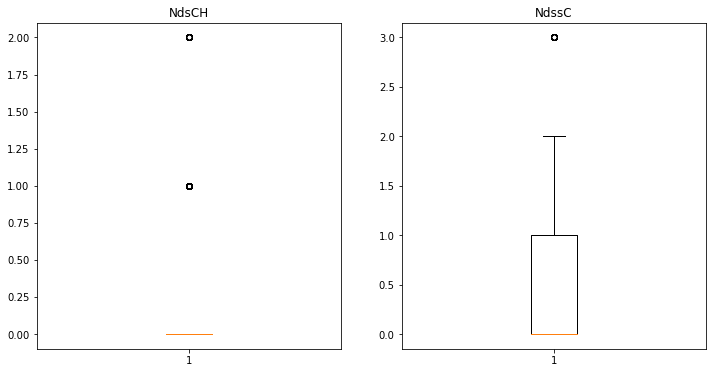

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.boxplot(dfi2['NdsCH'])
ax1.set_title("NdsCH")

ax2.boxplot(dfi2['NdssC'])
ax2.set_title("NdssC")

plt.show()

In [34]:
#Let's look at the correlation now
#See the correlation values of categoric features
category_feat.append('responseLC50')
print(dfi2[category_feat].corr().iloc[:, [-1]])
category_feat.remove('responseLC50')

              responseLC50
NdsCH             0.173582
NdssC             0.160661
responseLC50      1.000000


In [35]:
#Probably combining 'NdssC' isn't a good idea since the correlation with our output decreases
#Changing only the 'NdsCH' since combining the categories correlation with output increases 
dfi['NdsCH'] = dfi['NdsCH'].replace({3:2,4:2})
dfi['NdsCH'].value_counts()

0    760
1    107
2     41
Name: NdsCH, dtype: int64

NdsCH


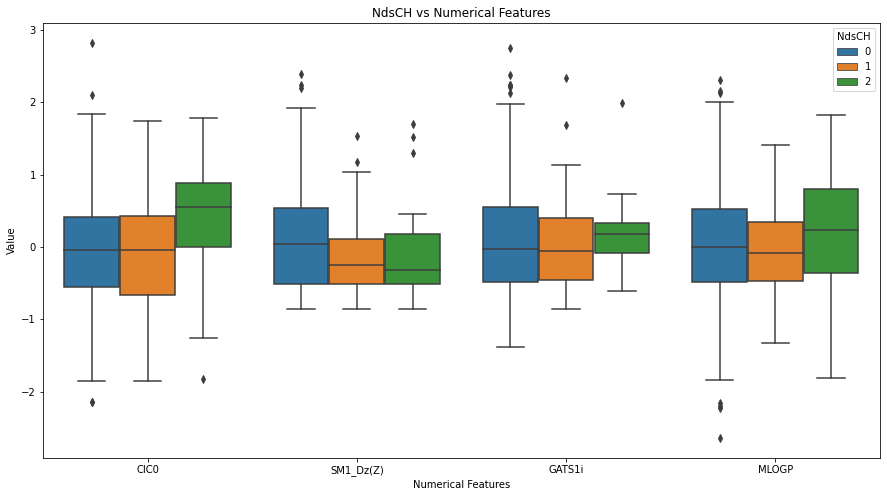

NdssC


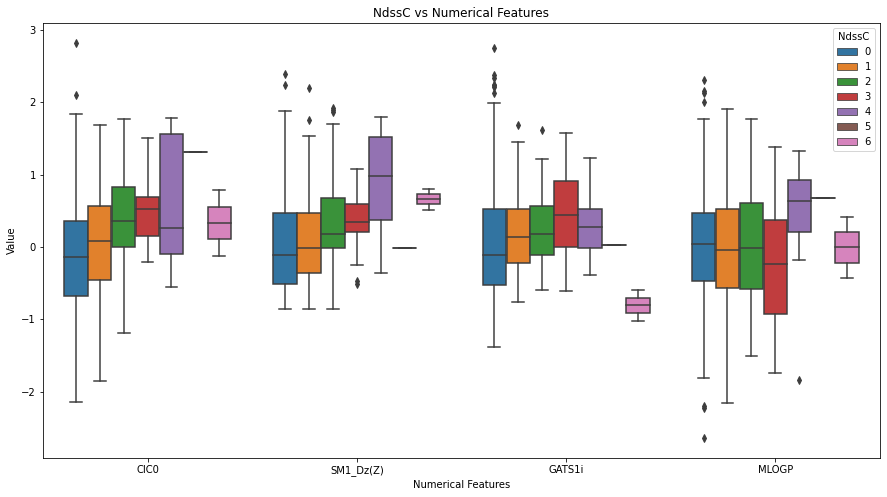

In [36]:
#BOX-PLOT
for i in category_feat:
    print(i)
    df2 = pd.concat([df_scaled, dfi.loc[:, i]], axis = 1)
    mdf2 = pd.melt(df2, id_vars = i, var_name = "features", value_name = "value")
    
    plt.figure(figsize = (15,8))
    sns.boxplot(x = "features", y = "value", hue = i, data = mdf2)
    
    plt.title(f'{i} vs Numerical Features')
    plt.xlabel("Numerical Features")
    plt.ylabel("Value")
    
    plt.show()

<AxesSubplot:>

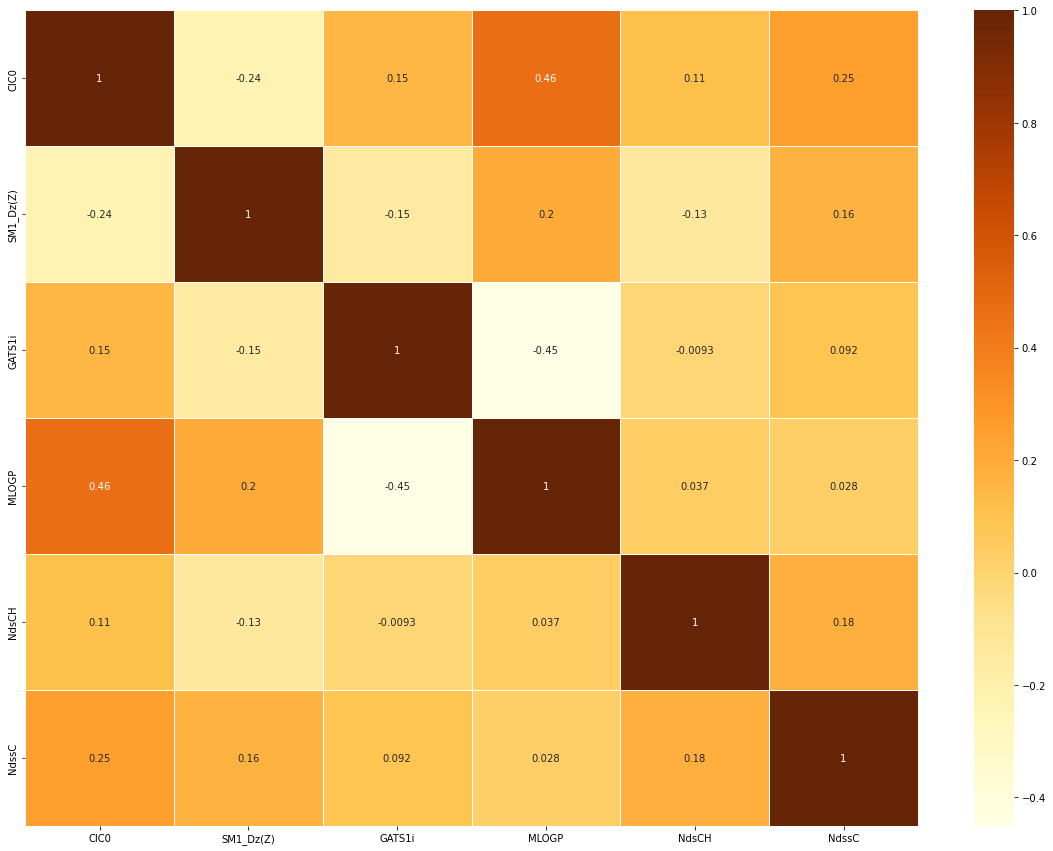

In [37]:
#HEATMAP
df_heat = pd.concat([df_scaled, dfi[category_feat]], axis = 1)
plt.figure(figsize = (20,15))
sns.heatmap(data = df_heat.corr(), cmap="YlOrBr", annot = True, linewidth = 0.5)

In [ ]:
'''NdsCH shows less correlation values with other features hence its more independent now'''